In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
import pickle
import re

In [4]:
sample=pd.read_csv("sample.csv")
sample.head(10)

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,956992,2015,3,4,3,DL,1582,N967DL,ATL,OMA,...,1709.0,6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,3247113,2015,7,22,3,AA,1280,N590AA,DTW,DFW,...,1401.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,4950835,2015,11,5,4,UA,1509,N68842,IAH,MCO,...,2254.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1636124,2015,4,15,3,WN,4469,N7814B,DEN,DAY,...,1605.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,3275209,2015,7,24,5,WN,1537,N945WN,MHT,MCO,...,858.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,1289823,2015,3,25,3,DL,1610,N3760C,DEN,DTW,...,1356.0,176.0,0,0,NaN,4.0,0.0,172.0,0.0,0.0
6,724283,2015,2,17,2,OO,4981,N751SK,IAH,BOI,...,2048.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,3108384,2015,7,14,2,MQ,3362,N694MQ,ORD,EVV,...,1024.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2069490,2015,5,12,2,EV,5240,N582CA,OKC,ATL,...,1304.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2280432,2015,5,25,1,DL,1732,N975AT,ATL,CLE,...,1530.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
profile = ProfileReport(sample, title="EDA Report")

In [7]:
profile.to_file("EDA_report.html")

c:\users\gowthaman\anaconda3\envs\airflight\lib\site-packages\pandas_profiling\visualisation\plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


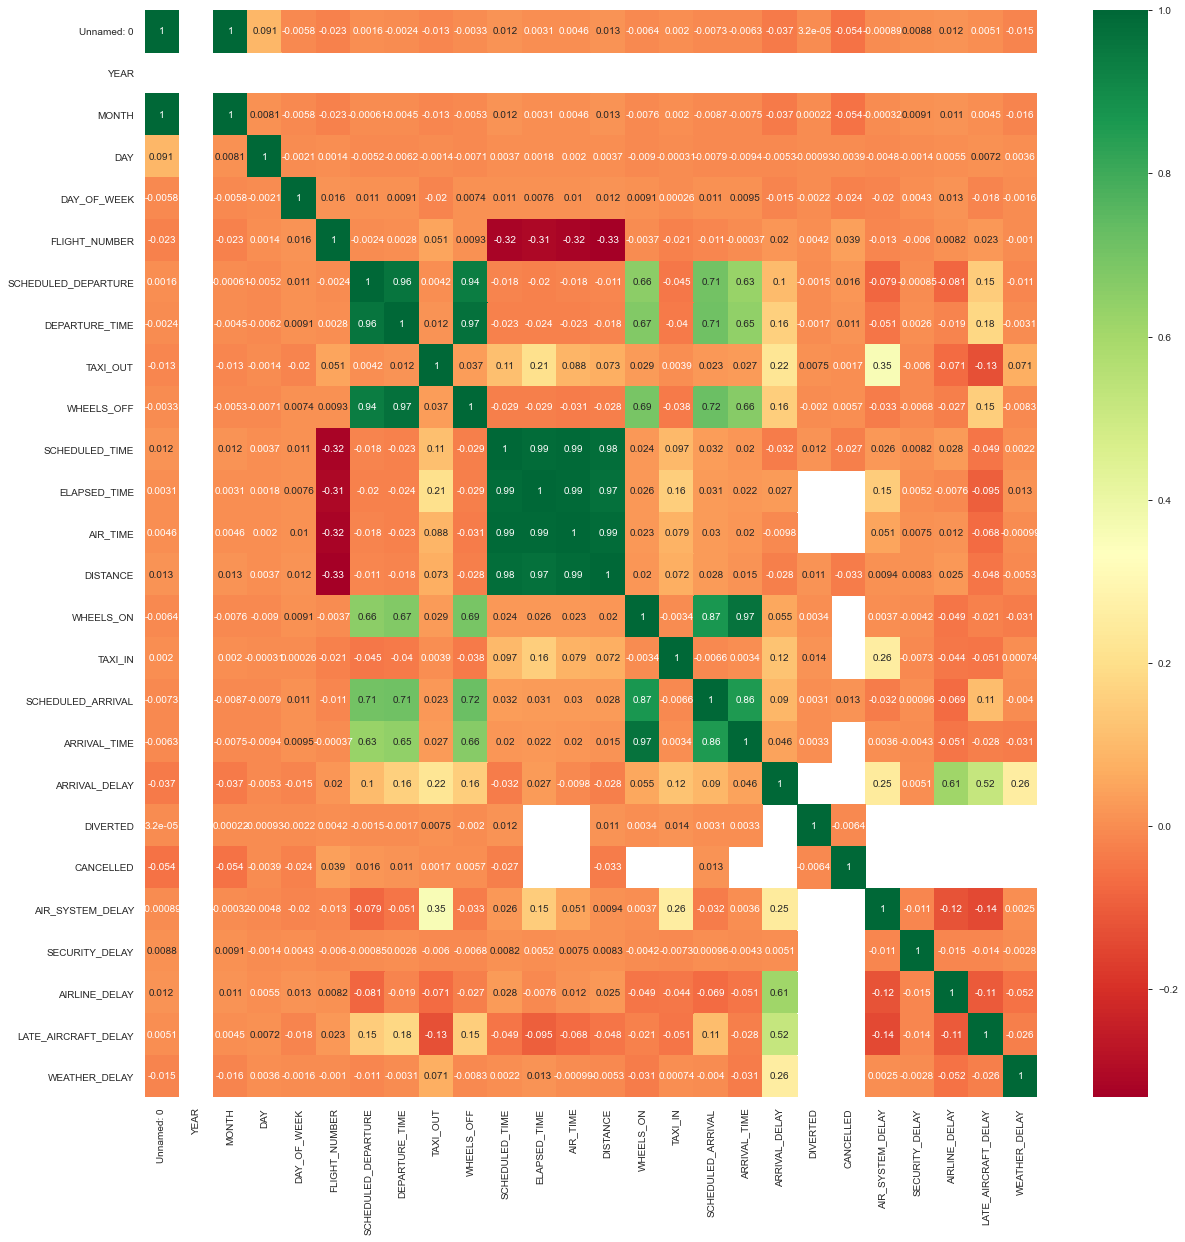

In [47]:
plt.figure(figsize = (20,20))
sns.heatmap(sample.drop(['DEPARTURE_DELAY'],axis=1).corr(),annot = True, cmap = "RdYlGn")
plt.show()

In [5]:
sample.corr()

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
Unnamed: 0,1.000000,NaN,0.996426,0.091331,-0.005815,-0.022809,0.001625,-0.002421,-0.022219,-0.012993,...,-0.007283,-0.006328,-0.037463,0.000032,-0.053814,-0.000887,0.008838,0.011561,0.005145,-0.015421
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,0.996426,NaN,1.000000,0.008103,-0.005827,-0.023025,-0.000610,-0.004505,-0.022097,-0.013117,...,-0.008706,-0.007460,-0.037202,0.000216,-0.053747,-0.000324,0.009108,0.011421,0.004491,-0.015877
DAY,0.091331,NaN,0.008103,1.000000,-0.002114,0.001392,-0.005218,-0.006181,-0.003028,-0.001355,...,-0.007941,-0.009412,-0.005301,-0.000930,-0.003911,-0.004833,-0.001382,0.005511,0.007242,0.003562
DAY_OF_WEEK,-0.005815,NaN,-0.005827,-0.002114,1.000000,0.015718,0.010756,0.009137,-0.009400,-0.020142,...,0.010658,0.009482,-0.015117,-0.002156,-0.024392,-0.019590,0.004257,0.013280,-0.017519,-0.001602
FLIGHT_NUMBER,-0.022809,NaN,-0.023025,0.001392,0.015718,1.000000,-0.002378,0.002796,-0.006133,0.051109,...,-0.011113,-0.000367,0.019847,0.004207,0.038912,-0.012548,-0.005965,0.008184,0.022836,-0.001045
SCHEDULED_DEPARTURE,0.001625,NaN,-0.000610,-0.005218,0.010756,-0.002378,1.000000,0.963186,0.113061,0.004206,...,0.707856,0.626728,0.102475,-0.001515,0.016180,-0.078589,-0.000854,-0.081102,0.146414,-0.010937
DEPARTURE_TIME,-0.002421,NaN,-0.004505,-0.006181,0.009137,0.002796,0.963186,1.000000,0.172160,0.012027,...,0.710904,0.645050,0.160688,-0.001732,0.011354,-0.051280,0.002614,-0.019048,0.181701,-0.003139
DEPARTURE_DELAY,-0.022219,NaN,-0.022097,-0.003028,-0.009400,-0.006133,0.113061,0.172160,1.000000,0.058061,...,0.098943,0.045185,0.945412,0.025005,0.034096,0.099662,0.008074,0.626055,0.549967,0.234451
TAXI_OUT,-0.012993,NaN,-0.013117,-0.001355,-0.020142,0.051109,0.004206,0.012027,0.058061,1.000000,...,0.022568,0.026597,0.224952,0.007521,0.001674,0.354844,-0.006016,-0.070557,-0.126907,0.071129


In [6]:
sample.isnull().sum()

Unnamed: 0                  0
YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER               696
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME           4253
DEPARTURE_DELAY          4253
TAXI_OUT                 4399
WHEELS_OFF               4399
SCHEDULED_TIME              0
ELAPSED_TIME             5205
AIR_TIME                 5205
DISTANCE                    0
WHEELS_ON                4575
TAXI_IN                  4575
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME             4575
ARRIVAL_DELAY            5205
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON    286508
AIR_SYSTEM_DELAY       237849
SECURITY_DELAY         237849
AIRLINE_DELAY          237849
LATE_AIRCRAFT_DELAY    237849
WEATHER_DELAY          237849
dtype: int64

In [7]:
## Converting into 24 hr time format
def conv_time(time_val):
    if pd.isnull(time_val):
        return np.nan
    else:
            # replace 24:00 o'clock with 00:00 o'clock:
        if time_val == 2400: time_val = 0
            # creating a 4 digit value out of input value:
        time_val = "{0:04d}".format(int(time_val))
            # creating a time datatype out of input value: 
        time_formatted = datetime.time(int(time_val[0:2]),int(time_val[2:4]))
    return time_formatted

In [8]:
sample['ARRIVAL_TIME'] = sample['ARRIVAL_TIME'].apply(conv_time)
sample['DEPARTURE_TIME'] =sample['DEPARTURE_TIME'].apply(conv_time)

In [9]:
# converting categoric value to numeric
sample.loc[sample['CANCELLATION_REASON'] == 'A', 'CANCELLATION_REASON'] = 1
sample.loc[sample['CANCELLATION_REASON'] == 'B', 'CANCELLATION_REASON'] = 2
sample.loc[sample['CANCELLATION_REASON'] == 'C', 'CANCELLATION_REASON'] = 3
sample.loc[sample['CANCELLATION_REASON'] == 'D', 'CANCELLATION_REASON'] = 4

# -----------------------------------
# converting NaN data to numeric zero
sample['CANCELLATION_REASON'] =sample['CANCELLATION_REASON'].fillna(0)

In [10]:
sample['ARRIVAL_DELAY']= sample['ARRIVAL_DELAY'].fillna(0)
sample['AIRLINE_DELAY'] = sample['AIRLINE_DELAY'].fillna(0)
sample['AIR_SYSTEM_DELAY'] =sample['AIR_SYSTEM_DELAY'].fillna(0)
sample['SECURITY_DELAY'] =sample['SECURITY_DELAY'].fillna(0)
sample['LATE_AIRCRAFT_DELAY'] =sample['LATE_AIRCRAFT_DELAY'].fillna(0)
sample['WEATHER_DELAY'] =sample['WEATHER_DELAY'].fillna(0)

In [11]:
# drop the last 1% of missing data rows.
sample = sample.dropna(axis=0)

In [12]:
## Extracting time into hours and minutes
sample[['Dept_hr','Dept_min','Dept_sec']] = sample['DEPARTURE_TIME'].astype(str).str.split(':', expand=True).astype(int)
sample[['Arr_hr','Arr_min','Arr_sec']] = sample['ARRIVAL_TIME'].astype(str).str.split(':', expand=True).astype(int)

In [13]:
sample.isnull().sum()

Unnamed: 0             0
YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
Dept_hr                0
Dept_min               0
Dept_sec               0
Arr_hr                 0
Arr_min                0
Arr_sec                0
dtype: int64

In [14]:
sample['AIRLINE'].value_counts()

WN    61983
DL    43662
AA    35754
OO    28565
EV    27634
UA    25178
MQ    14107
B6    13252
US     9863
AS     8700
NK     5667
F9     4508
HA     3801
VX     3075
Name: AIRLINE, dtype: int64

In [15]:
sample['ORIGIN_AIRPORT'].value_counts()

ATL      17221
ORD      13782
DFW      11627
DEN       9771
LAX       9687
         ...  
15295        1
14222        1
10333        1
10165        1
10779        1
Name: ORIGIN_AIRPORT, Length: 616, dtype: int64

In [16]:
sample['ORIGIN_AIRPORT'] = sample['ORIGIN_AIRPORT'].apply(lambda x: re.sub('[0-9]+', 'OTH-O', x))
sample['DESTINATION_AIRPORT'] = sample['DESTINATION_AIRPORT'].apply(lambda x: re.sub('[0-9]+', 'OTH-D', x))

In [17]:
## Selecting top 25 frequently used origin airports
## Applying one hot encoding for top 25 origin airports
top_25=[x for x in sample.ORIGIN_AIRPORT.value_counts().sort_values(ascending=False).head(25).index]
for label in top_25:
    sample[label]=np.where(sample['ORIGIN_AIRPORT']==label,1,0)
sample[['ORIGIN_AIRPORT']+top_25].head(30)
top_25

['OTH-O',
 'ATL',
 'ORD',
 'DFW',
 'DEN',
 'LAX',
 'PHX',
 'SFO',
 'IAH',
 'LAS',
 'SEA',
 'MSP',
 'MCO',
 'DTW',
 'BOS',
 'EWR',
 'CLT',
 'SLC',
 'LGA',
 'JFK',
 'BWI',
 'MDW',
 'FLL',
 'DCA',
 'MIA']

In [18]:
def one_hot_top_x(sample,variable,top_x_labels):
    for label in top_x_labels:
        sample[variable+'_'+label]=np.where(sample[variable]==label,1,0)
sample1=sample[['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT']]
one_hot_top_x(sample1,'ORIGIN_AIRPORT',top_25)
sample1.head()

c:\users\gowthaman\anaconda3\envs\airflight\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,ORIGIN_AIRPORT_OTH-O,ORIGIN_AIRPORT_ATL,ORIGIN_AIRPORT_ORD,ORIGIN_AIRPORT_DFW,ORIGIN_AIRPORT_DEN,ORIGIN_AIRPORT_LAX,ORIGIN_AIRPORT_PHX,...,ORIGIN_AIRPORT_EWR,ORIGIN_AIRPORT_CLT,ORIGIN_AIRPORT_SLC,ORIGIN_AIRPORT_LGA,ORIGIN_AIRPORT_JFK,ORIGIN_AIRPORT_BWI,ORIGIN_AIRPORT_MDW,ORIGIN_AIRPORT_FLL,ORIGIN_AIRPORT_DCA,ORIGIN_AIRPORT_MIA
0,DL,ATL,OMA,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AA,DTW,DFW,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,UA,IAH,MCO,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,WN,DEN,DAY,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,WN,MHT,MCO,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
## Selecting top 25 frequently used  destination airports
## Applying one hot encoding for top 25 destination airports
d_top_25=[x for x in sample.DESTINATION_AIRPORT.value_counts().sort_values(ascending=False).head(25).index]
d_top_25
for label in d_top_25:
    sample[label]=np.where(sample['DESTINATION_AIRPORT']==label,1,0)
sample[['DESTINATION_AIRPORT']+d_top_25].head(30)
one_hot_top_x(sample1,'DESTINATION_AIRPORT',d_top_25)
sample1.head()
d_top_25

c:\users\gowthaman\anaconda3\envs\airflight\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


['OTH-D',
 'ATL',
 'ORD',
 'DFW',
 'DEN',
 'LAX',
 'PHX',
 'SFO',
 'IAH',
 'LAS',
 'SEA',
 'MCO',
 'MSP',
 'DTW',
 'BOS',
 'CLT',
 'SLC',
 'EWR',
 'LGA',
 'JFK',
 'BWI',
 'MDW',
 'DCA',
 'FLL',
 'MIA']

In [20]:
## Selecting frequently used  airlines
## Applying one hot encoding for  airlines
a_top=[x for x in sample.AIRLINE.value_counts().sort_values(ascending=False).index]
a_top
for label in a_top:
    sample[label]=np.where(sample['AIRLINE']==label,1,0)
sample[['AIRLINE']+a_top].head(14)
one_hot_top_x(sample1,'AIRLINE',a_top)
sample1.head()

c:\users\gowthaman\anaconda3\envs\airflight\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,ORIGIN_AIRPORT_OTH-O,ORIGIN_AIRPORT_ATL,ORIGIN_AIRPORT_ORD,ORIGIN_AIRPORT_DFW,ORIGIN_AIRPORT_DEN,ORIGIN_AIRPORT_LAX,ORIGIN_AIRPORT_PHX,...,AIRLINE_EV,AIRLINE_UA,AIRLINE_MQ,AIRLINE_B6,AIRLINE_US,AIRLINE_AS,AIRLINE_NK,AIRLINE_F9,AIRLINE_HA,AIRLINE_VX
0,DL,ATL,OMA,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AA,DTW,DFW,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,UA,IAH,MCO,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,WN,DEN,DAY,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,WN,MHT,MCO,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
sample1=sample1.drop(['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT'],axis=1)
sample1.columns

Index(['ORIGIN_AIRPORT_OTH-O', 'ORIGIN_AIRPORT_ATL', 'ORIGIN_AIRPORT_ORD',
       'ORIGIN_AIRPORT_DFW', 'ORIGIN_AIRPORT_DEN', 'ORIGIN_AIRPORT_LAX',
       'ORIGIN_AIRPORT_PHX', 'ORIGIN_AIRPORT_SFO', 'ORIGIN_AIRPORT_IAH',
       'ORIGIN_AIRPORT_LAS', 'ORIGIN_AIRPORT_SEA', 'ORIGIN_AIRPORT_MSP',
       'ORIGIN_AIRPORT_MCO', 'ORIGIN_AIRPORT_DTW', 'ORIGIN_AIRPORT_BOS',
       'ORIGIN_AIRPORT_EWR', 'ORIGIN_AIRPORT_CLT', 'ORIGIN_AIRPORT_SLC',
       'ORIGIN_AIRPORT_LGA', 'ORIGIN_AIRPORT_JFK', 'ORIGIN_AIRPORT_BWI',
       'ORIGIN_AIRPORT_MDW', 'ORIGIN_AIRPORT_FLL', 'ORIGIN_AIRPORT_DCA',
       'ORIGIN_AIRPORT_MIA', 'DESTINATION_AIRPORT_OTH-D',
       'DESTINATION_AIRPORT_ATL', 'DESTINATION_AIRPORT_ORD',
       'DESTINATION_AIRPORT_DFW', 'DESTINATION_AIRPORT_DEN',
       'DESTINATION_AIRPORT_LAX', 'DESTINATION_AIRPORT_PHX',
       'DESTINATION_AIRPORT_SFO', 'DESTINATION_AIRPORT_IAH',
       'DESTINATION_AIRPORT_LAS', 'DESTINATION_AIRPORT_SEA',
       'DESTINATION_AIRPORT_MCO', 'DESTINATION_AIRP

In [22]:
flight1=pd.concat([sample,sample1])
flight1=flight1.drop(['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT'],axis=1)

In [23]:
flight1.isnull().sum()

Unnamed: 0     285749
YEAR           285749
MONTH          285749
DAY            285749
DAY_OF_WEEK    285749
                ...  
AIRLINE_AS     285749
AIRLINE_NK     285749
AIRLINE_F9     285749
AIRLINE_HA     285749
AIRLINE_VX     285749
Length: 139, dtype: int64

In [24]:
flight1=flight1.fillna(0)
flight1 = flight1.dropna(axis=0)

In [25]:
## Feature Importance based on Correlation
threshold=0.5
def correlation(flight1, threshold): 
    col_corr = set() # Set of all the names of correlated columns 
    corr_matrix = flight1.corr() 
    for i in range(len(corr_matrix.columns)):
        for j in range(i): 
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value 
                colname = corr_matrix.columns[i]
                col_corr.add(colname) 
    return col_corr

In [72]:
correlation(flight1.drop(["DEPARTURE_DELAY"],axis=1),threshold)

{'AIRLINE_DELAY',
 'AIR_TIME',
 'Arr_hr',
 'Arr_min',
 'DAY',
 'DAY_OF_WEEK',
 'DESTINATION_AIRPORT_OTH-D',
 'DISTANCE',
 'Dept_hr',
 'Dept_min',
 'ELAPSED_TIME',
 'FLIGHT_NUMBER',
 'LATE_AIRCRAFT_DELAY',
 'MONTH',
 'OO',
 'OTH-D',
 'SCHEDULED_ARRIVAL',
 'SCHEDULED_DEPARTURE',
 'SCHEDULED_TIME',
 'TAXI_IN',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'YEAR'}

In [26]:
x=flight1.drop(['Unnamed: 0', 'YEAR', 'DAY_OF_WEEK','FLIGHT_NUMBER','TAIL_NUMBER',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'WHEELS_OFF', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE','OTH-O', 'OTH-D',
       'WHEELS_ON', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME','ORD','SEA', 'MSP', 'MCO', 'DTW', 'BOS', 'EWR', 'CLT', 'SLC',
       'LGA', 'JFK', 'BWI', 'MDW', 'FLL', 'DCA', 'MIA',
       'ATL', 'DFW', 'DEN', 'LAX', 'IAH', 'SFO', 'PHX', 'LAS',
       'WN', 'AA', 'DL', 'EV', 'OO', 'UA', 'MQ', 'B6', 'US', 'NK','F9', 'AS', 'VX', 'HA',
       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'SECURITY_DELAY',
       'Dept_sec', 'Arr_sec'],axis=1)
y=flight1['DEPARTURE_DELAY']

In [27]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(x,y,test_size=0.2)

In [28]:
RF_model=RandomForestRegressor()
RF_model.fit(X_Train,Y_Train)

RandomForestRegressor()

In [29]:
Y_pred=RF_model.predict(X_Train)
Y_pred2=RF_model.predict(X_Test)

In [30]:
# R_squared Value
print('R_squared:',r2_score(Y_Train,Y_pred))
print('R_squared:',r2_score(Y_Test,Y_pred2))

R_squared: 0.996296013168808
R_squared: 0.9724643886562007


In [31]:
# MSE and RMSE Value for training data
print('MSE:',mean_squared_error(Y_Train,Y_pred))
print('RMSE:',np.sqrt(mean_squared_error(Y_Train,Y_pred)))

MSE: 2.6600827354887833
RMSE: 1.6309760070242552


In [32]:
# MSE and RMSE Value for testing data
print('MSE:',mean_squared_error(Y_Test,Y_pred2))
print('RMSE:',np.sqrt(mean_squared_error(Y_Test,Y_pred2)))

MSE: 18.68941345581802
RMSE: 4.323125426796916


Text(0, 0.5, 'fitted_values')

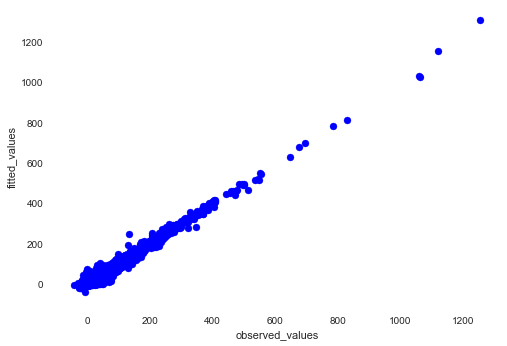

In [33]:
## Observed Vs Fitted Values
plt.scatter(Y_Test,Y_pred2,c="b");plt.xlabel("observed_values");plt.ylabel("fitted_values")

In [40]:
data=X_Test[0:200]
data=data.fillna(0)
data = data.dropna(axis=0)

In [41]:
data=data.to_csv(r'F:\ML Projects\Air Flight Delay\data.csv',index=False)

# Hypertunning Model

In [32]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in Random Forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=500,num=12)]
# Number of Features to be considered at each split
max_features=["auto","sqrt"]
# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
# Minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]
# # Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]
X_train,X_test,Y_train,y_test=train_test_split(x,y,test_size=0.2)
## Create random grid 
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}
reg_rf=RandomForestRegressor()
## Random Search of parameters using 5 fold cross validation
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [43]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=390, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=390, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 2.0min
[CV] n_estimators=390, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.0min remaining:    0.0s


[CV]  n_estimators=390, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 2.1min
[CV] n_estimators=390, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=390, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 2.0min
[CV] n_estimators=390, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=390, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 2.0min
[CV] n_estimators=390, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=390, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 2.0min
[CV] n_estimators=463, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=463, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total= 3.0min
[CV] n_estimators=463, min_samples_split=10, min_s

[CV]  n_estimators=318, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  52.4s
[CV] n_estimators=318, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=318, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  53.0s
[CV] n_estimators=318, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=318, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  53.3s
[CV] n_estimators=318, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=318, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  53.0s
[CV] n_estimators=318, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=318, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  53.0s
[CV] n_estimators=318, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 415.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 136, 172, 209,
                                                         245, 281, 318, 354,
                                                         390, 427, 463, 500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [44]:
rf_random.best_params_ 

{'n_estimators': 318,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [51]:
import pickle
file=open('Flight_rf.pkl','wb')
pickle.dump(rf_random,file)

In [3]:
rf=open('Flight_rf.pkl','rb')
forest=pickle.load(rf)

In [33]:
predict1=forest.predict(X_train)
predict2=forest.predict(X_test)

In [39]:
# R_squared Value for training and testing
print('R_squared:',r2_score(Y_train,predict1))
print('R_squared:',r2_score(y_test,predict2))

R_squared: 0.9825825916537251
R_squared: 0.9823487802957876


In [35]:
# MSE and RMSE Value for training data
print("MSE:",mean_squared_error(Y_train,predict1))
print("RMSE:",sqrt(mean_squared_error(Y_train,predict1)))

MSE: 12.4081165590842
RMSE: 3.522515657748621


In [36]:
# MSE and RMSE Value for testing data
print("MSE:",mean_squared_error(y_test,predict2))
print("RMSE:",sqrt(mean_squared_error(y_test,predict2)))

MSE: 12.38799793638476
RMSE: 3.51965878124354


Text(0, 0.5, 'fitted_values')

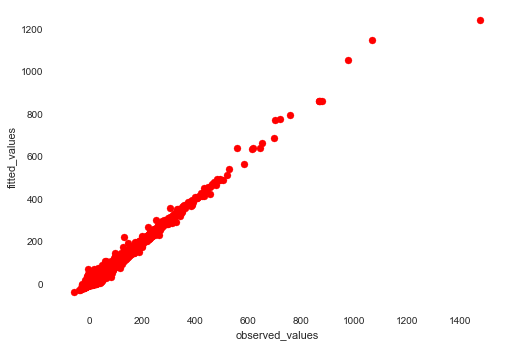

In [38]:
## Observed Vs Fitted Values
plt.scatter(y_test,predict2,c="r");plt.xlabel("observed_values");plt.ylabel("fitted_values")